<img src="https://matplotlib.org/_static/logo2.svg" width=200px>

https://matplotlib.org

-------------------

Matplotlib is a Python __2D plotting__ library which produces __publication quality figures__ in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and __IPython__ shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.

Matplotlib tries to make easy things easy and hard things possible. You can __generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code__. For examples, see the sample plots and thumbnail gallery.

For __simple plotting__ the pyplot module provides a _MATLAB-like interface_, particularly when combined with IPython. For the __power user__, you have full control of line styles, font properties, axes properties, etc, via an _object oriented interface_ or via a set of functions familiar to MATLAB users.

# Seaborn
<img src="https://seaborn.pydata.org/_static/scatterplot_matrix_thumb.png?v=0.9.0" width=200px>

https://seaborn.pydata.org/index.html

https://seaborn.pydata.org/api.html

https://seaborn.pydata.org/tutorial.html

--------------

Seaborn is a library for making __statistical graphics__ in Python. It is built __on top of matplotlib__ and closely integrated with __pandas data structures__.

Here is some of the functionality that seaborn offers:

* A dataset-oriented API for examining __relationships between multiple variables__
* Specialized support for using categorical variables to show observations or aggregate statistics
* Options for visualizing univariate or bivariate distributions and for comparing them between subsets of data
* Automatic estimation and plotting of linear regression models for different kinds dependent variables
* Convenient views onto the overall structure of complex datasets
* High-level abstractions for structuring __multi-plot grids__ that let you easily build complex visualizations
* Concise control over matplotlib figure styling with several built-in themes
* Tools for choosing color palettes that faithfully reveal patterns in your data

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 40)
pd.set_option('precision', 2)

import matplotlib.pyplot as plt
import seaborn as sns

# Zusammenhänge zwischen Variablen mit Streudiagrammen (Scatterplots) darstellen

### Daten laden

In [3]:
df = pd.read_csv("vmdata.csv")
print(df.shape)
df.head()

(910, 9)


name vsys  frc  subnetid  formofway     cv_q      ar_q  DIFF_ABS  DIFF_REL
0  Zst_0  CAR    2       401          3   3664.0   3739.82     75.82      2.07
1  Zst_1  CAR    0     13001          1  13702.0  11916.50  -1785.50    -13.03
2  Zst_2  CAR    0     13001          1  13743.0  13627.70   -115.30     -0.84
3  Zst_3  CAR    0     13001          1  29175.0  28676.50   -498.50     -1.71
4  Zst_4  CAR    0     13001          1  31719.0  31004.90   -714.10     -2.25

### Einfachster Fall

In [4]:
sns.relplot(x="cv_q", 
            y="DIFF_REL",
            data=df);

### Größe ändern

In [5]:
sns.relplot(x="cv_q", 
            y="DIFF_REL", 
            height=6,            # <-- NEU            
            aspect=2,            # <-- NEU  
            data=df);

### Semantische Variable: `hue`

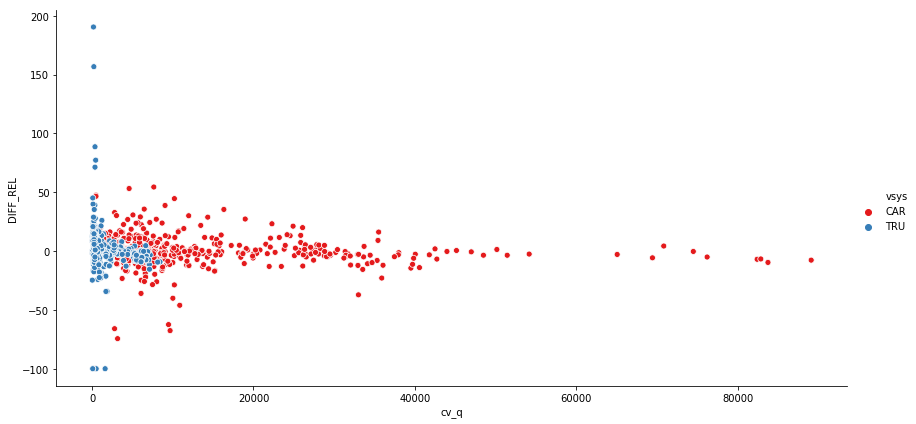

In [6]:
sns.relplot(x="cv_q", 
            y="DIFF_REL",
            hue="vsys",          # <-- NEU
            palette="Set1",      # <-- NEU
            height=6, 
            aspect=2, 
            data=df);

#### Palette auswählen

Über Palettennamen:

https://matplotlib.org/gallery/color/colormap_reference.html

Über Hilfsfunktion:

In [7]:
pal = sns.choose_colorbrewer_palette("qualitative")

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

In [8]:
pal

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804)]

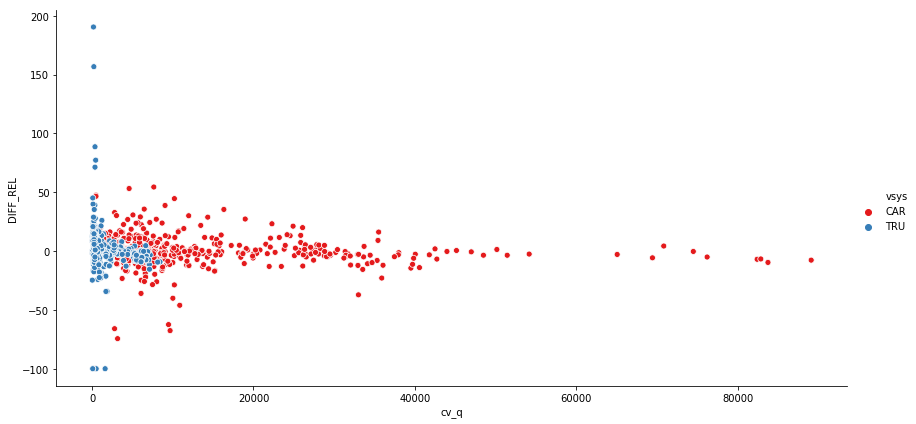

In [9]:
sns.relplot(x="cv_q", 
            y="DIFF_REL",
            hue="vsys",          
            palette=pal,      # <-- GEÄNDERT
            height=6, 
            aspect=2, 
            data=df);

### Semantische Variable: `style`

In [10]:
sns.relplot(x="cv_q", 
            y="DIFF_REL",
            hue="vsys",
            style="frc",       # <-- NEU
            palette="Set1",
            height=6, 
            aspect=2, 
            data=df);

Marker selbst definieren

https://matplotlib.org/api/markers_api.html

In [11]:
markers = {
    0: ".",
    1: "o",
    2: "v",
    3: "^",
    4: ">"
}

sns.relplot(x="cv_q", 
            y="DIFF_REL",
            hue="vsys",
            style="frc",       
            palette="Set1",
            markers=markers,    # <-- NEU
            height=6, 
            aspect=2, 
            data=df);

### Semantische Variable: `size`

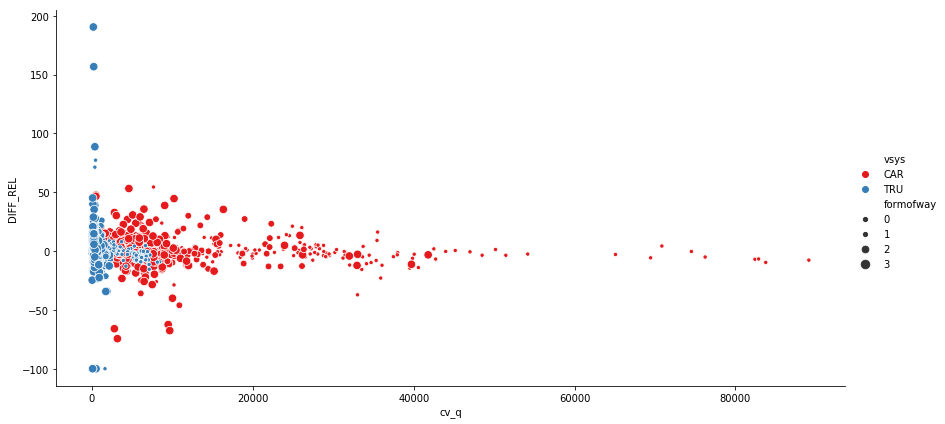

In [12]:
sns.relplot(x="cv_q", 
            y="DIFF_REL",
            hue="vsys",
            size="formofway",    # <-- NEU
            palette="Set1",
            height=6, 
            aspect=2, 
            data=df);

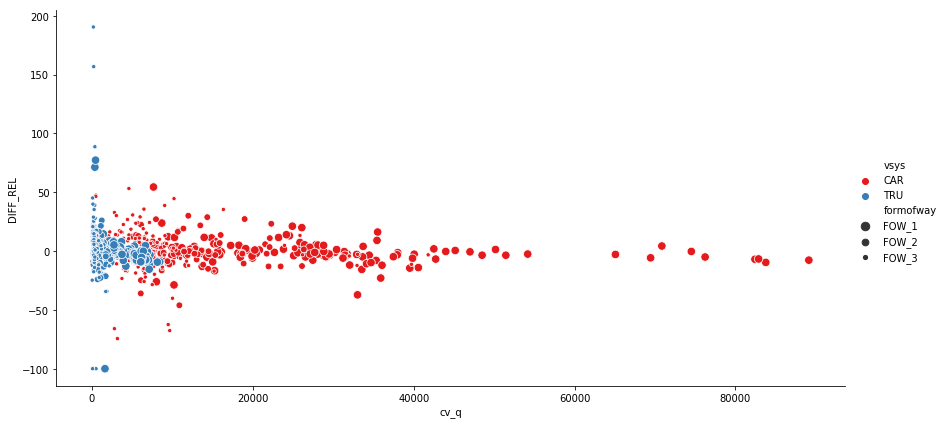

In [13]:
df_neu = df.astype({"formofway": str})
df_neu.formofway = "FOW_" + df_neu.formofway
sns.relplot(x="cv_q", 
            y="DIFF_REL",
            hue="vsys",
            size="formofway",    
            size_order=["FOW_1", "FOW_2", "FOW_3"],
            palette="Set1",
            height=6, 
            aspect=2, 
            data=df_neu);

### Beschriftungen

In [14]:
df_neu = df.astype({"formofway": str})
df_neu.formofway = "FOW_" + df_neu.formofway
sns.relplot(x="cv_q", 
            y="DIFF_REL",
            hue="vsys",
            size="formofway",    
            size_order=["FOW_1", "FOW_2", "FOW_3"],
            palette="Set1",
            height=6, 
            aspect=2, 
            data=df_neu);

def label_outliers(ax, x, y, val, y_limit=0):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    a = a.sort_values("y", ascending=False)
    for i, point in a.iterrows():
        if point.y > abs(y_limit) or point.y < abs(y_limit) * -1:
            ax.text(point['x']+.02, point['y'], str(point['val']))

label_outliers(plt.gca(), df.cv_q, df.DIFF_REL, df.name, y_limit=50) 

# Kontinuität betonen mit Liniendiagrammen

### Daten laden

In [15]:
# https://www.data.gv.at/katalog/dataset/4707e82a-154f-48b2-864c-89fffc6334e1

df2 = pd.read_csv("https://www.wien.gv.at/gogv/l9ogddauerzaehlstellen", sep=";", encoding="latin1", na_values=-29)

month_name_to_number = {
    "JAN.": 1,
    "FEB.": 2,
    "MÄRZ": 3,
    "APRIL": 4,
    "MAI": 5,
    "JUNI": 6,
    "JULI": 7,
    "AUG.": 8,
    "SEP.": 9,
    "OKT": 10,
    "NOV": 11,
    "DEZ.": 12
}
df2["TIME"] = df2.apply(
    lambda x: pd.Timestamp(str(x.JAHR) + "-{:02d}".format(month_name_to_number[x.MONAT])), 
    axis=1)

# https://www.data.gv.at/katalog/dataset/stadt-wien_verkehrszhlstellenstandortewien

import geopandas as gpd
url = "https://data.wien.gv.at/daten/geo?service=WFS&request=GetFeature&version=1.1.0&srsName=EPSG:4326&outputFormat=json&typeName=ogdwien:DAUERZAEHLOGD"
df_geo = gpd.read_file(url)
df2 = df_geo.merge(df2, left_on="ZST_ID", right_on="ZNR")

df2.head()

id  OBJECTID  ZST_ID  \
0  DAUERZAEHLOGD.fid--40056193_16a5897ba07_16eb    167321    1194   
1  DAUERZAEHLOGD.fid--40056193_16a5897ba07_16eb    167321    1194   
2  DAUERZAEHLOGD.fid--40056193_16a5897ba07_16eb    167321    1194   
3  DAUERZAEHLOGD.fid--40056193_16a5897ba07_16eb    167321    1194   
4  DAUERZAEHLOGD.fid--40056193_16a5897ba07_16eb    167321    1194   

        ZST_NAME STR_NR BETRIEBNAHME RICHTUNG_1      RICHTUNG_2  \
0  Prager Straße     B3   2004-03-25    Zentrum  Langenzersdorf   
1  Prager Straße     B3   2004-03-25    Zentrum  Langenzersdorf   
2  Prager Straße     B3   2004-03-25    Zentrum  Langenzersdorf   
3  Prager Straße     B3   2004-03-25    Zentrum  Langenzersdorf   
4  Prager Straße     B3   2004-03-25    Zentrum  Langenzersdorf   

                                                LAGE GERAETEART  \
0  R1: 5m nach Mayerweckstr.; R2: 5m nach Mayerwe...       M_SG   
1  R1: 5m nach Mayerweckstr.; R2: 5m nach Mayerwe...       M_SG   
2  R1: 5m nach Mayerweckstr.; R2: 5m nach Mayerwe...       M_SG   
3  R1: 5m nach Mayerweckstr.; R2: 5m nach Mayerwe...       M_SG   
4  R1: 5m nach Mayerweckstr.; R2: 5m nach Mayerwe...       M_SG   

      GERAETEART_TXT SE_ANNO_CAD_DATA  \
0  MIV_Scheifengerät             None   
1  MIV_Scheifengerät             None   
2  MIV_Scheifengerät             None   
3  MIV_Scheifengerät             None   
4  MIV_Scheifengerät             None   

                                      geometry  JAHR MONAT   ZNR  \
0  POINT (16.37933643663819 48.29289683995164)  2017  JULI  1194   
1  POINT (16.37933643663819 48.29289683995164)  2017  JULI  1194   
2  POINT (16.37933643663819 48.29289683995164)  2017  JULI  1194   
3  POINT (16.37933643663819 48.29289683995164)  2017  JULI  1194   
4  POINT (16.37933643663819 48.29289683995164)  2017  JULI  1194   

           ZNAME STRTYP  STRNR        RINAME FZTYP   DTVMS    DTVMF    DTVMO  \
0  Prager Straße      B      3       Zentrum   Kfz  4992.0   5545.0   5487.0   
1  Prager Straße      B      3       Zentrum  LkwÄ   186.0    244.0    242.0   
2  Prager Straße      B      3  Langenzersd.   Kfz  4869.0   5470.0   5421.0   
3  Prager Straße      B      3  Langenzersd.  LkwÄ   182.0    240.0    245.0   
4  Prager Straße      B      3        Gesamt   Kfz  9860.0  11015.0  10908.0   

     DTVDD    DTVFR    DTVSA   DTVSF    TVMAX     TVMAXT       TIME  
0   5437.0   5940.0   5331.0  2328.0   6178.0  Fr,07.07. 2017-07-01  
1    250.0    228.0     93.0    35.0    267.0  Do,13.07. 2017-07-01  
2   5361.0   5859.0   5125.0  2086.0   6138.0  Fr,07.07. 2017-07-01  
3    244.0    223.0     83.0    36.0    269.0  Mi,12.07. 2017-07-01  
4  10798.0  11798.0  10456.0  4414.0  12316.0  Fr,07.07. 2017-07-01

In [16]:
# Muss gemacht werden, um Warnung bei Darstellung von Timestamp loszuwerden
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Einfacher Fall

Daten werden automatisch aggregiert: Durchschnitt und 95%-Konfidenzintervall

In [17]:
sns.relplot(x="TIME", 
            y="DTVMF", 
            kind="line",
            height=6,
            aspect=2,
            data=df2);

#### Zoom auf einzelne Zählstelle und FZTYP 'Kfz'

In [18]:
sns.relplot(x="TIME", 
            y="DTVMF", 
            kind="line",
            hue="RINAME",   # <-- NEU
            height=6,
            aspect=2,
            data=df2[(df2.ZNAME == "Westbahnhof") & (df2.FZTYP == "Kfz")]);      # <-- NEU

#### Sinnvollere Aggregierung

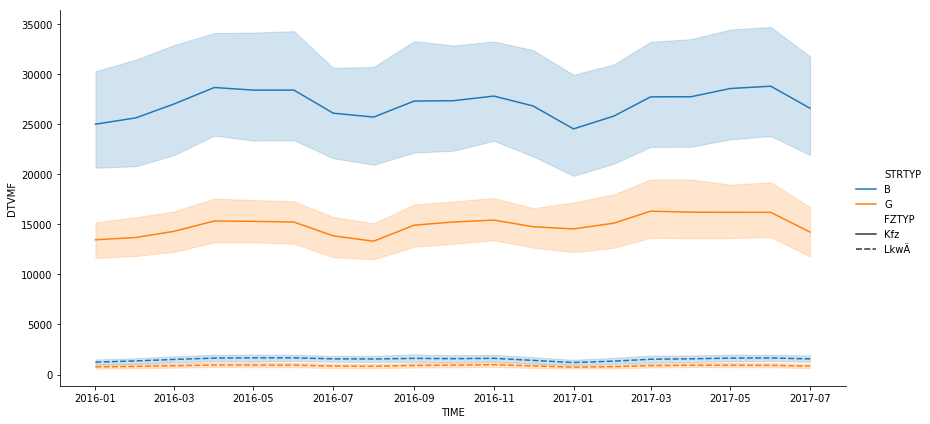

In [19]:
sns.relplot(x="TIME", 
            y="DTVMF", 
            kind="line",
            hue="STRTYP",     # <-- NEU
            style="FZTYP",    # <-- NEU
            height=6,
            aspect=2,
            data=df2[df2.RINAME == "Gesamt"]);

#### Einzelne Fälle darstellen: `units` und `estimator`

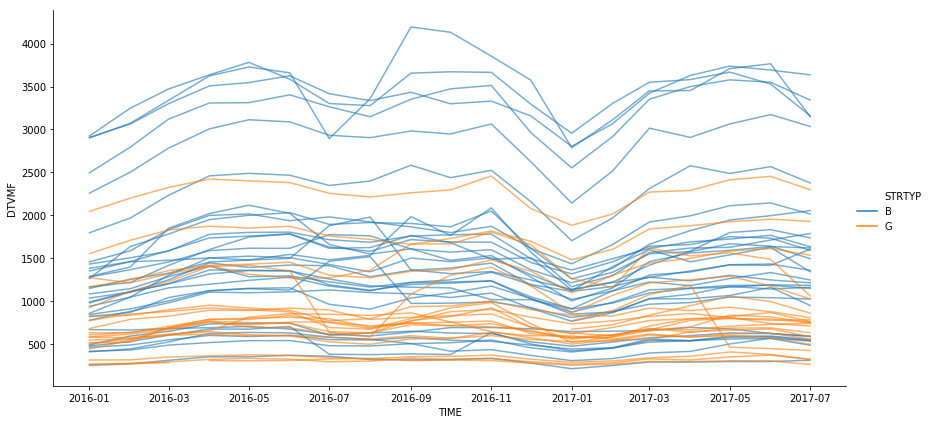

In [20]:
sns.relplot(x="TIME", 
            y="DTVMF", 
            kind="line",
            hue="STRTYP",
            units="ZNAME",      # <-- NEU
            estimator=None,     # <-- NEU
            alpha=0.6,
            height=6,
            aspect=2,
            data=df2[(df2.RINAME == "Gesamt") & (df2.FZTYP == "LkwÄ")]);      # <-- NEU

# Facetten

#### Spalten bilden: `col`

In [21]:
sns.relplot(x="TIME", 
            y="DTVMF", 
            kind="line",
            hue="STRTYP",
            col="STRTYP",         # <-- NEU
            units="ZNAME",
            estimator=None,
            alpha=0.6,
            height=8,
            aspect=1.2,
            data=df2[(df2.RINAME == "Gesamt") & (df2.FZTYP == "LkwÄ")]);

#### Zeilen bilden: `row`

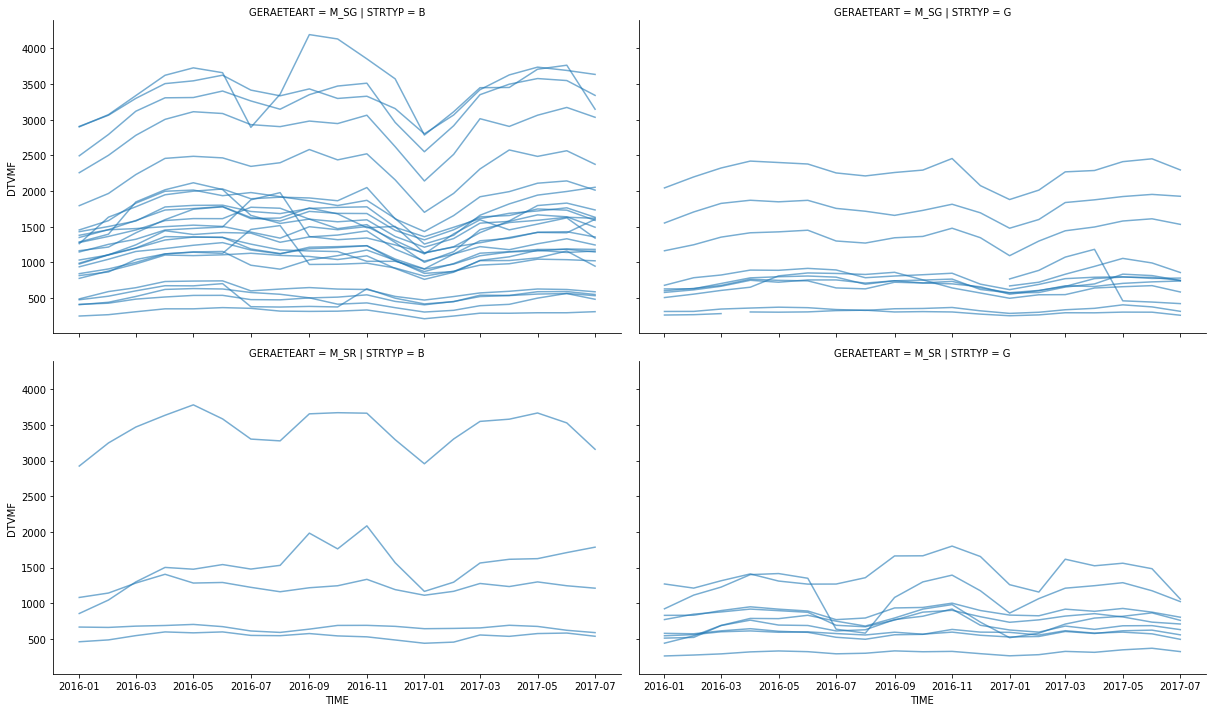

In [22]:
sns.relplot(x="TIME", 
            y="DTVMF", 
            kind="line",
            col="STRTYP",
            row="GERAETEART",      # <-- NEU
            units="ZNAME",
            estimator=None,
            alpha=0.6,
            height=5,
            aspect=1.7,
            data=df2[(df2.RINAME == "Gesamt") & (df2.FZTYP == "LkwÄ")]);

#### Zeilenumbruch: `col_wrap`

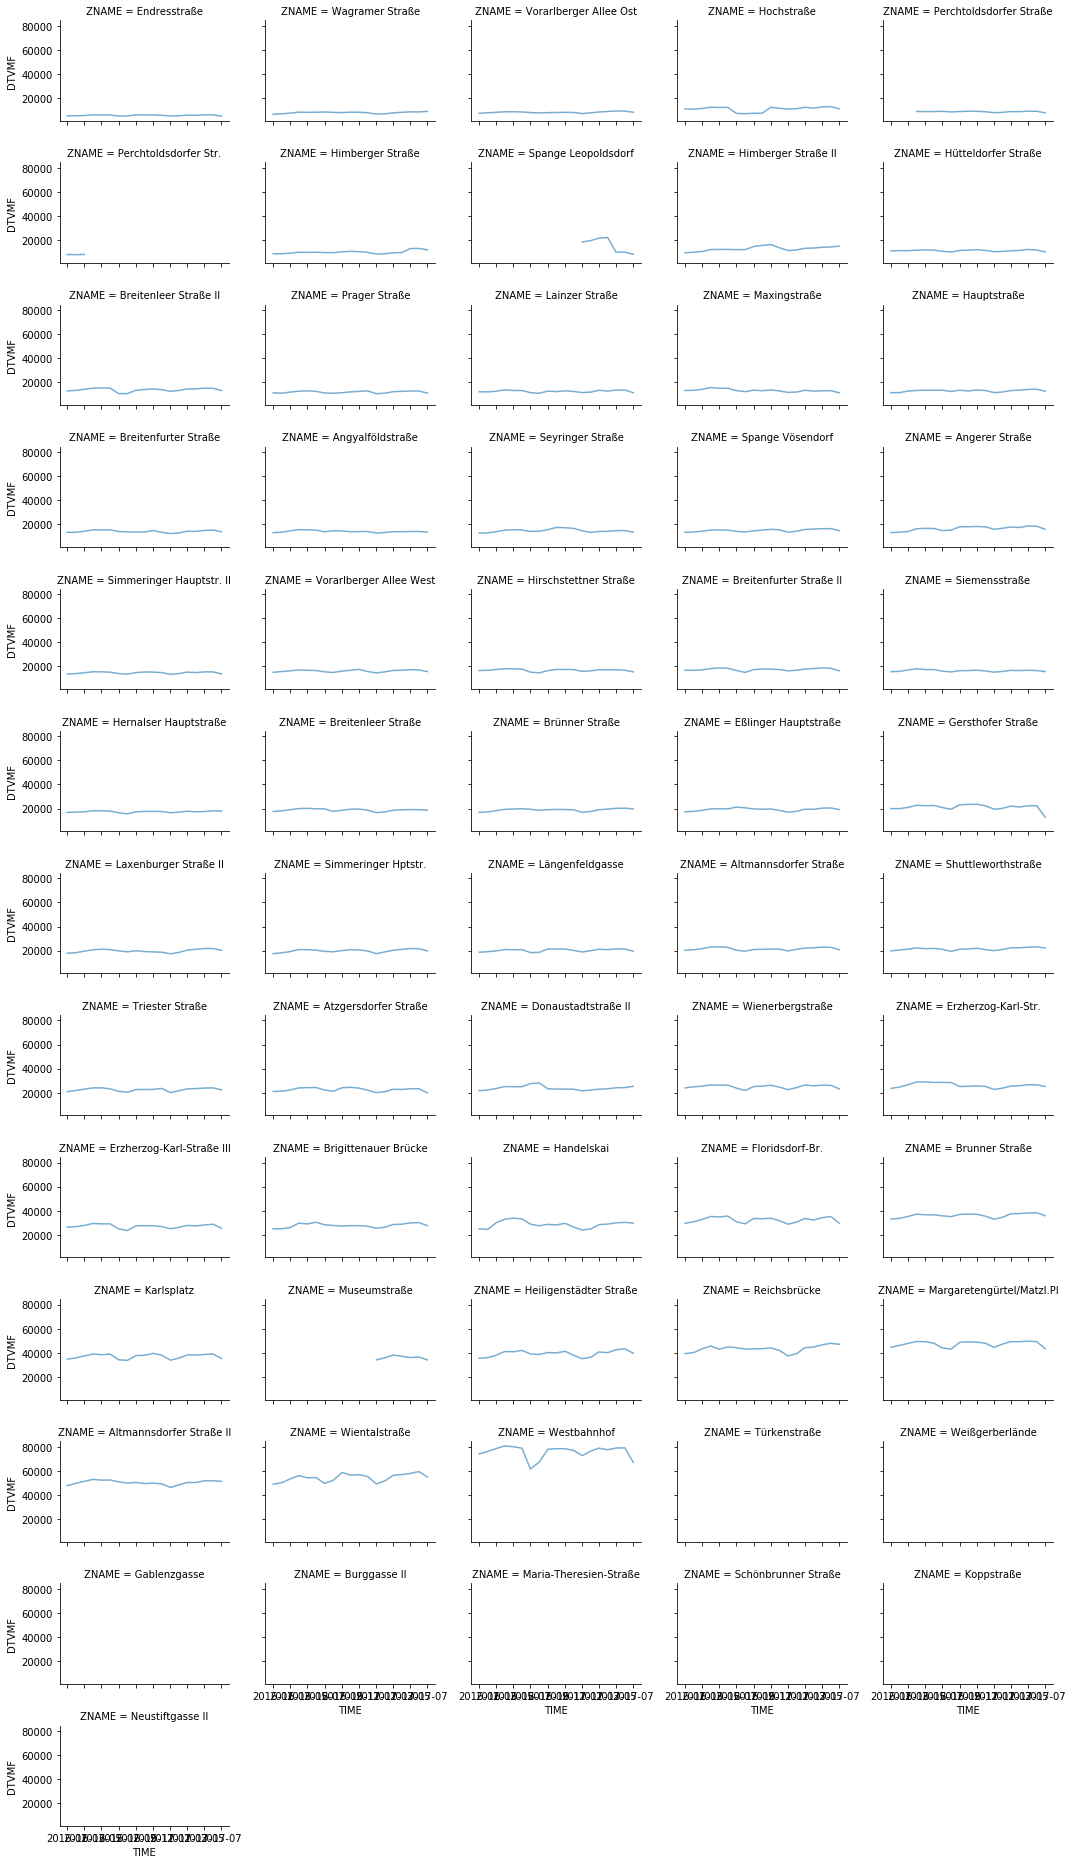

In [23]:
sns.relplot(x="TIME", 
            y="DTVMF", 
            kind="line",
            col="ZNAME",
            col_wrap=5,      # <-- NEU
            alpha=0.6,
            height=2,
            aspect=1.5,
            data=df2[(df2.RINAME == "Gesamt") & (df2.FZTYP == "Kfz")].sort_values("TVMAX"));   # <-- NEU

# Andere Plots

### Heatmap

In [24]:
df2_pivot = df2[df2.RINAME != "Gesamt"].pivot_table(values="DTVMF", index="ZNAME", columns="TIME")
df2_pivot.head()

TIME                      2016-01-01  2016-02-01  2016-03-01  2016-04-01  \
ZNAME                                                                      
Altmannsdorfer Straße         5332.0     5469.75     5708.50     6081.25   
Altmannsdorfer Straße II     12491.0    13041.00    13511.00    13981.25   
Angerer Straße                3425.5     3526.75     3711.25     4292.50   
Angyalföldstraße              3404.5     3530.00     3833.75     4099.25   
Atzgersdorfer Straße          5398.0     5466.00     5730.25     6175.25   

TIME                      2016-05-01  2016-06-01  2016-07-01  2016-08-01  \
ZNAME                                                                      
Altmannsdorfer Straße        6151.25     6023.25     5395.00     5174.25   
Altmannsdorfer Straße II    13845.00    13864.50    13456.50    13194.75   
Angerer Straße               4349.25     4331.50     3866.50     3976.75   
Angyalföldstraße             4058.50     4000.00     3621.75     3842.50   
Atzgersdorfer Straße         6268.00     6299.75     5777.00     5512.25   

TIME                      2016-09-01  2016-10-01  2016-11-01  2016-12-01  \
ZNAME                                                                      
Altmannsdorfer Straße        5548.50     5579.50     5635.00     5577.00   
Altmannsdorfer Straße II    13327.25    13099.25    13209.25    12948.00   
Angerer Straße               4692.50     4718.50     4788.75     4669.25   
Angyalföldstraße             3797.00     3639.75     3665.25     3658.75   
Atzgersdorfer Straße         6253.50     6315.75     6116.75     5666.50   

TIME                      2017-01-01  2017-02-01  2017-03-01  2017-04-01  \
ZNAME                                                                      
Altmannsdorfer Straße        5174.50     5574.75     5842.75     5894.75   
Altmannsdorfer Straße II    12096.50    12746.50    13329.50    13309.75   
Angerer Straße               4136.25     4349.50     4630.00     4514.25   
Angyalföldstraße             3309.50     3453.25     3631.25     3635.75   
Atzgersdorfer Straße         5147.75     5373.00     5874.00     5836.75   

TIME                      2017-05-01  2017-06-01  2017-07-01  
ZNAME                                                         
Altmannsdorfer Straße        6048.50     6032.50     5515.00  
Altmannsdorfer Straße II    13691.75    13732.75    13568.75  
Angerer Straße               4846.25     4803.25     4133.50  
Angyalföldstraße             3679.50     3700.25     3526.00  
Atzgersdorfer Straße         6004.50     5996.00     5139.50

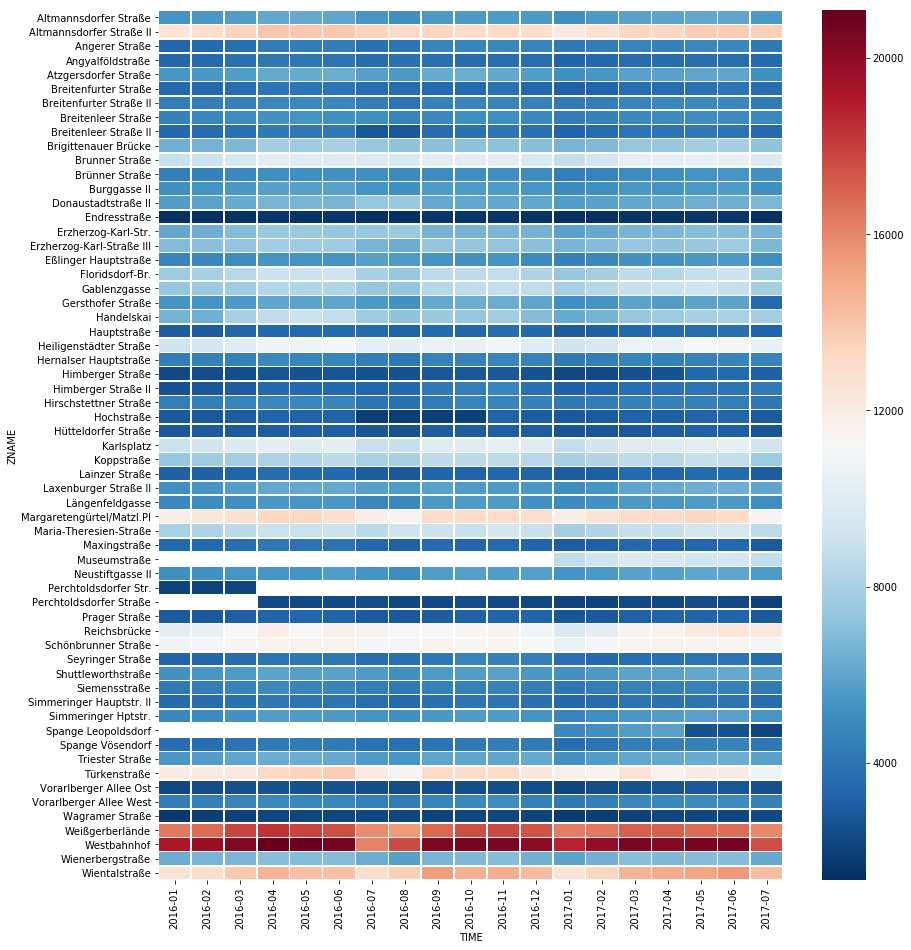

In [25]:
# Größe ändern
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,16))

# Heatmap
# sns.heatmap(df2_pivot, cmap="RdBu_r", linewidths=.5);
sns.heatmap(df2_pivot, cmap="RdBu_r", linewidths=.5, ax=ax);

# Ticklabels ändern
ax.set_xticklabels([i.strftime("%Y-%m") for i in df2_pivot.columns], rotation=90);

### Pairplot

C:\Users\rolandl_its-mod02\Anaconda3\envs\its_techtalk_scipy\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\rolandl_its-mod02\Anaconda3\envs\its_techtalk_scipy\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


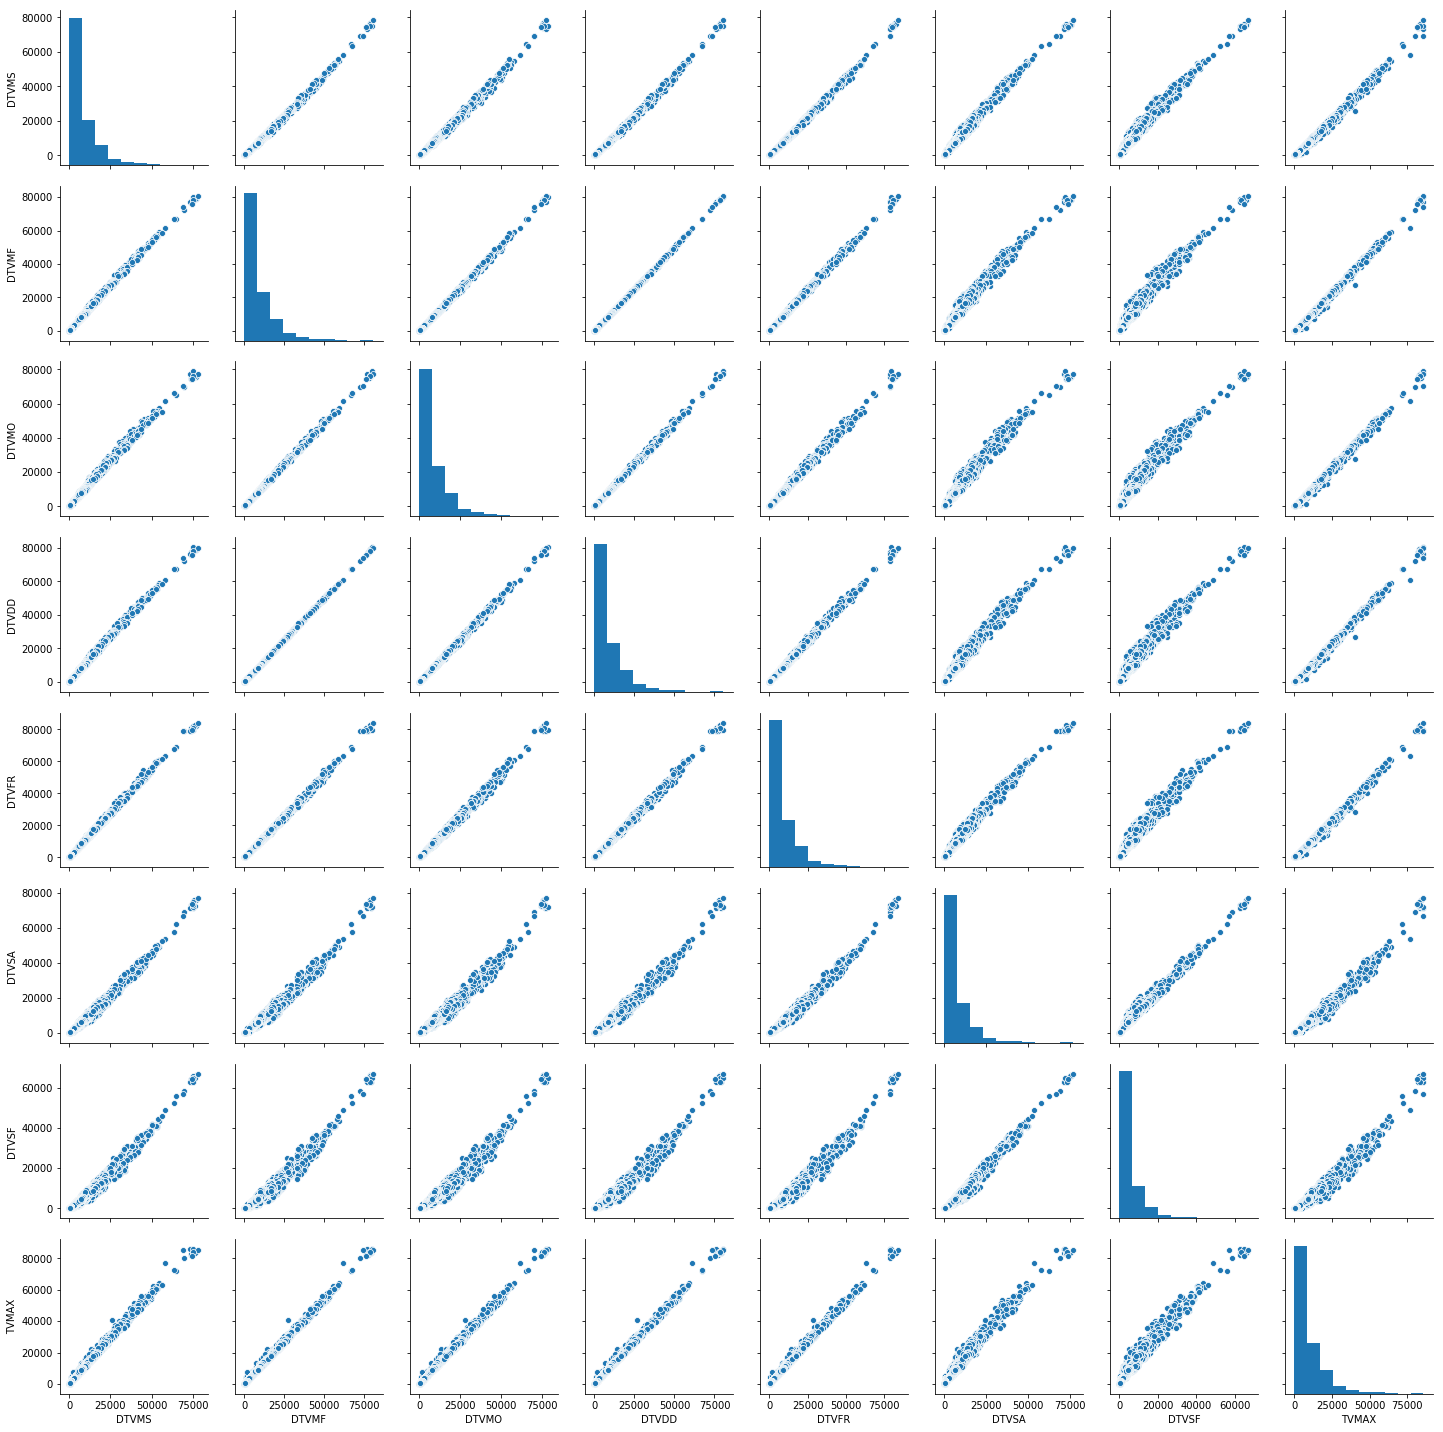

In [26]:
sns.pairplot(df2[['DTVMS', 'DTVMF', 'DTVMO', 'DTVDD', 'DTVFR', 'DTVSA', 'DTVSF', 'TVMAX']]);

# Übungen

0) Verändere die obigen Zellen nach Belieben!

1) Lade den folgenden Datensatz und erstelle ein beliebiges Diagramm!

In [27]:
tips = sns.load_dataset("tips")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4